In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, cluster, \
    preprocessing, metrics, pipeline, tree, ensemble, decomposition

pd.options.display.max_columns = 1000
%matplotlib inline

In [23]:
df = pd.read_csv("/data/stocks.csv").sort_values("date", ascending = False)
df.head()

,date,open,high,low,close,volume,adjclose,symbol
1857091,2016-08-15,36.430000,36.650002,36.049999,36.070000,3112500.0,36.070000,SE
1856762,2016-08-15,79.349998,79.750000,78.209999,78.919998,10867700.0,78.919998,CRM
1856749,2016-08-15,113.839996,114.800003,113.309998,114.620003,2975600.0,114.620003,CELG
1856750,2016-08-15,68.279999,69.510002,68.160004,69.440002,2021300.0,69.440002,KLAC
1856751,2016-08-15,36.500000,36.950001,36.330002,36.880001,5616400.0,36.880001,LUV


In [24]:
def diff(v1, v2):
    return (v1-v2)/v1

In [29]:
df["d1"] = -1
df["d2"] = -1
df["d3"] = -1
df["d4"] = -1
for s in np.unique(df.symbol):
    filtered = df.symbol == s
    df.loc[filtered, "d1"] = diff(df[filtered].adjclose, df[filtered].adjclose.shift(-1))
    df.loc[filtered, "d2"] = diff(df[filtered].adjclose, df[filtered].adjclose.shift(-2))
    df.loc[filtered, "d3"] = diff(df[filtered].adjclose, df[filtered].adjclose.shift(-4))
    df.loc[filtered, "d4"] = diff(df[filtered].adjclose, df[filtered].adjclose.shift(-7))

In [30]:
df[df.symbol == "AA"].head()

,date,open,high,low,close,volume,adjclose,symbol,d1,d2,d3,d4
1856803,2016-08-15,10.25,10.58,10.23,10.52,13191900.0,10.52,AA,0.033270,0.009506,0.016160,0.011407
1856302,2016-08-12,10.37,10.40,10.12,10.17,13887600.0,10.17,AA,-0.024582,-0.015733,-0.027532,-0.023599
1855801,2016-08-11,10.35,10.44,10.30,10.42,9894100.0,10.42,AA,0.008637,0.006718,-0.007678,0.012476
1855300,2016-08-10,10.40,10.53,10.27,10.33,9513400.0,10.33,AA,-0.001936,-0.011617,-0.006776,-0.010606
1854799,2016-08-09,10.42,10.50,10.35,10.35,7812800.0,10.35,AA,-0.009662,-0.014493,-0.005797,-0.023104


In [31]:
df[df.symbol == "C"].head()

,date,open,high,low,close,volume,adjclose,symbol,d1,d2,d3,d4
1856836,2016-08-15,45.820000,46.500000,45.820000,46.389999,12246800.0,46.389999,C,0.017461,0.014227,0.010563,0.054969
1856335,2016-08-12,45.410000,45.599998,45.220001,45.580002,12472900.0,45.580002,C,-0.003291,0.002852,-0.008337,0.037078
1855834,2016-08-11,45.509998,45.910000,45.290001,45.730000,14819400.0,45.730000,C,0.006123,-0.003718,0.000219,0.059917
1855333,2016-08-10,45.799999,45.900002,45.389999,45.450001,16566700.0,45.450001,C,-0.009901,-0.011221,0.035424,0.044665
1854832,2016-08-09,45.950001,46.110001,45.669998,45.900002,12203800.0,45.900002,C,-0.001307,0.003922,0.043791,0.045534


In [37]:
X.head()

,d1,d2,d3,d4
1857091,-0.008040,-0.001941,0.005961,-0.010214
1856762,-0.034339,-0.032438,-0.028637,-0.020781
1856749,0.010731,0.007067,0.007154,-0.014395
1856750,0.016705,0.027794,-0.106431,-0.097712
1856751,0.009761,-0.009761,-0.015727,0.012473


In [43]:
X = df.query("date == '2016-07-01'")[["d1", "d2", "d3", "d4"]]
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[-0.7242862 ,  0.66030724, -0.59401032,  1.25227744],
       [-0.28096367,  2.09548331,  1.13538137,  1.62912369],
       [-0.11478219,  0.56662739,  0.28499714, -1.49507612],
       ...,
       [-0.15631619,  1.20372553,  2.53166036,  0.808311  ],
       [-0.77400327,  0.05101369,  1.08732741, -3.31665089],
       [ 0.25704446,  0.1548631 , -1.08443776,  0.89777632]])

In [45]:
kmeans = cluster.KMeans(n_clusters=10)
y_k = kmeans.fit_predict(X)

In [47]:
df_20160701 = df.query("date == '2016-07-01'")

In [49]:
df_20160701

,date,open,high,low,close,volume,adjclose,symbol,d1,d2,d3,d4,cluster
1841727,2016-07-01,106.970001,107.089996,105.730003,105.870003,1220800.0,105.443228,MKC,-0.007556,0.029848,0.039860,0.053840,5
1841731,2016-07-01,59.110001,59.599998,58.520000,59.439999,4418200.0,58.986181,PAYX,-0.001009,0.055518,0.086978,0.069482,3
1841730,2016-07-01,41.320000,42.090000,41.000000,41.529999,1997400.0,41.529999,VIAB,0.001445,0.028172,0.063809,-0.060197,2
1841729,2016-07-01,69.500000,70.080002,69.059998,69.639999,1823900.0,69.439857,O,0.004021,0.016944,0.041160,0.078529,5
1841728,2016-07-01,39.560001,39.970001,39.160000,39.490002,8173200.0,39.128538,MET,-0.008610,0.007344,0.074956,-0.077488,2
1841720,2016-07-01,73.000000,73.110001,72.470001,72.500000,1098700.0,71.957318,KLAC,-0.010345,0.005793,0.016966,-0.024828,7
1841724,2016-07-01,93.360001,93.980003,93.070000,93.839996,9946300.0,93.046536,XOM,0.001066,0.014706,0.053069,0.028453,5
1841726,2016-07-01,25.200001,25.570000,24.930000,25.110001,10774900.0,25.051585,SCHW,-0.007965,-0.007567,0.042214,-0.128634,2
1841725,2016-07-01,43.020000,44.000000,43.000000,43.570000,2476600.0,43.570000,BBBY,0.008033,0.015378,0.039247,0.008951,9
1841723,2016-07-01,74.930000,75.040001,74.330002,74.650002,591900.0,74.650002,CINF,-0.003215,0.023711,0.069524,0.054521,3


In [59]:
df_20160701[df_20160701.cluster == 1]["symbol"]

1841739     BAX
1841741     URI
1841745     COG
1841746    AKAM
1841695     BSX
1841703     BLK
1841788     ADI
1841794      CB
1841750     NSC
1841799     XEC
1841800    AMAT
1841806       C
1841781    AVGO
1841778    WLTW
1841754     MAT
1841759     CMA
1841774     KMI
1841777       L
1841687    HBAN
1841599     NFX
1841608    ALLE
1841612     TXN
1841591     AES
1841574      XL
1841586    INTC
1841587    GRMN
1841620     GLW
1841653     MHK
1841628     LEG
1841629     BBT
           ... 
1842047     HIG
1842046     ADM
1842050    VRSK
1842052     TMK
1842003    VRSN
1842007    SBUX
1842010     STI
1842013     APD
1842017      MS
1842019     JCI
1842020       M
1842021    ORCL
1842027     SYF
1842028     AIG
1841858    TRIP
1841863     MLM
1841864     NKE
1841865    FSLR
1841844    QRVO
1841816     OKE
1841822      GS
1841827     PBI
1841922     WDC
1841919     COF
1841925    SPGI
1841926    TROW
1841927     BEN
1841891     JPM
1841889     STX
1841892     NWL
Name: symbol, Length: 75

In [54]:
df_20160701.cluster.value_counts()

5    104
9     88
1     75
7     65
3     59
2     54
4     38
0      9
8      8
6      1
Name: cluster, dtype: int64

In [58]:
df_20160701[df_20160701.symbol == "MSFT"]

,date,open,high,low,close,volume,adjclose,symbol,d1,d2,d3,d4,cluster
1841979,2016-07-01,51.130001,51.720001,51.07,51.16,21400400.0,51.16,MSFT,-0.000195,0.012119,0.053362,0.003323,1


In [60]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

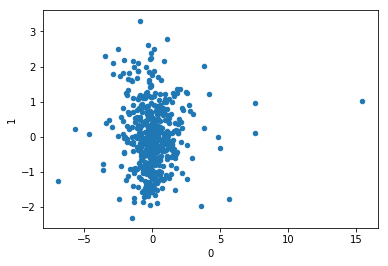

In [62]:
pd.DataFrame(X_pca).plot.scatter(0, 1)